In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Reading data
raw = mne.io.read_raw_nihon('data/FA330022.EEG', preload=True)

Loading FA330022.EEG
Reading header from /home/paosoriom/Universidad/Master Thesis/dev_thesis_SEEG/data/FA330022.EEG


/tmp/ipykernel_351/1333077938.py:2: RuntimeWarning: No PNT file exists. Metadata will be blank
  raw = mne.io.read_raw_nihon('data/FA330022.EEG', preload=True)


Reading 0 ... 299499  =      0.000 ...   598.998 secs...


/tmp/ipykernel_351/1333077938.py:2: RuntimeWarning: No LOG file exists. Annotations will not be read
  raw = mne.io.read_raw_nihon('data/FA330022.EEG', preload=True)


In [3]:
#Pick only EEG channels
raw.pick_types(eeg=True, bio=False, misc=False)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawNihon | FA330022.EEG, 23 x 299500 (599.0 s), ~52.6 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


Effective window size : 4.096 (s)


/tmp/ipykernel_351/3880221071.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
/home/paosoriom/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


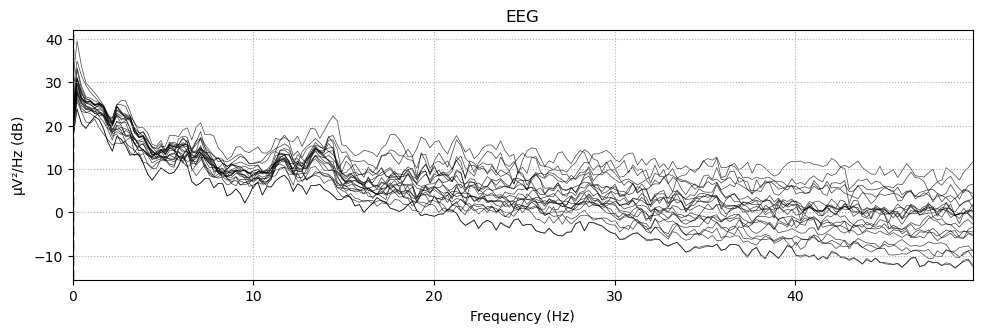

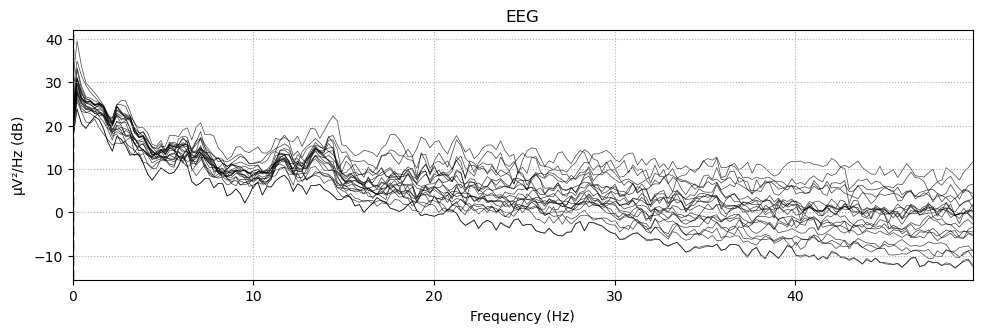

In [4]:
#Channels list
channels = raw.ch_names
channels_to_remove=['E']
raw.drop_channels(channels_to_remove)

raw.plot_psd(fmax=50)

In [92]:
raw.ch_names

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'PG1',
 'PG2',
 'A1',
 'A2',
 'T1',
 'T2']

In [5]:
# Step 4: Filtering
raw.filter(l_freq = 0, h_freq = 97.0)
# Set the frequency you want to remove; it's commonly 50 Hz or 60 Hz
notch_freq = 60  # or 60 for the USA and other countries using 60Hz
# Apply notch filter
raw.notch_filter(freqs = notch_freq)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 97 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 97.00 Hz
- Upper transition bandwidth: 24.25 Hz (-6 dB cutoff frequency: 109.12 Hz)
- Filter length: 69 samples (0.138 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished


<RawNihon | FA330022.EEG, 22 x 299500 (599.0 s), ~50.3 MB, data loaded>

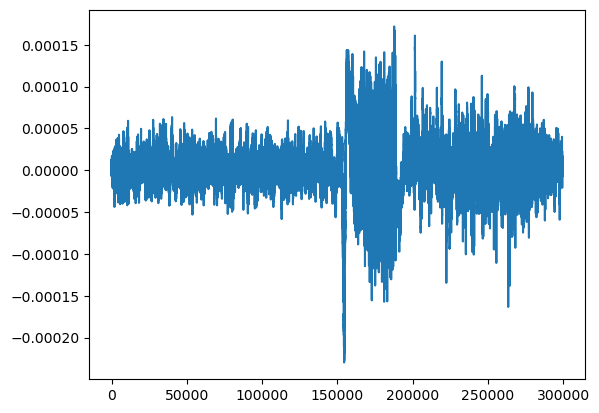

In [93]:
data=raw.get_data()[6]
#plotting data
plt.plot(data)
plt.show()

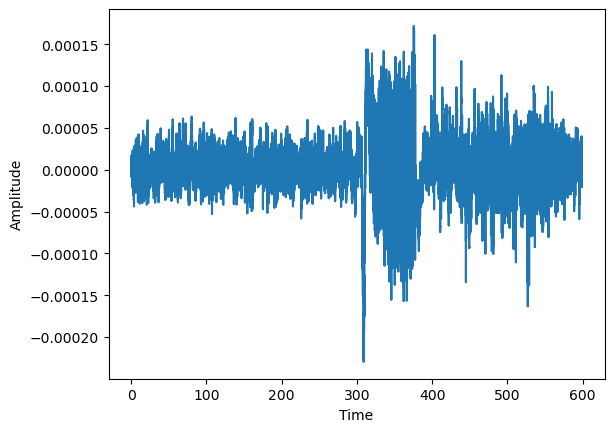

In [94]:
#Sampling signal at 500 Hz
fs=500
#Sampling period
T=1/fs
#Length of signal
L=len(data)
#Time vector
t=np.arange(0,L)*T
#Plotting signal
plt.plot(t,data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

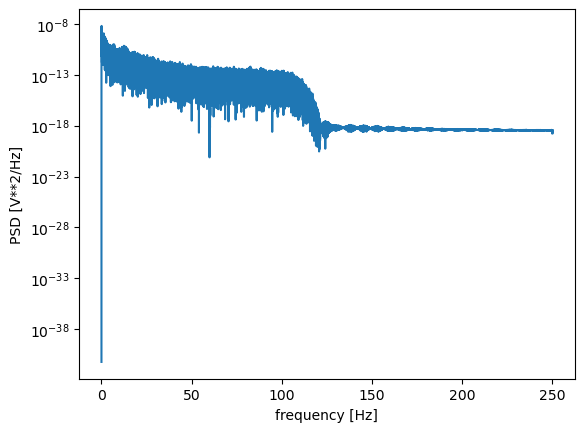

In [95]:
#Getting the energy spectral density gammma(w)=(X(w)*X(w))/2pi where X(w) is the fourier transform of x(t)
#and x(t) is the signal. Using the periodogram method
#Getting the periodogram of the signal data
f, Pxx_den = signal.periodogram(data,fs=raw.info['sfreq'],scaling='density')
#plotting the periodogram
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

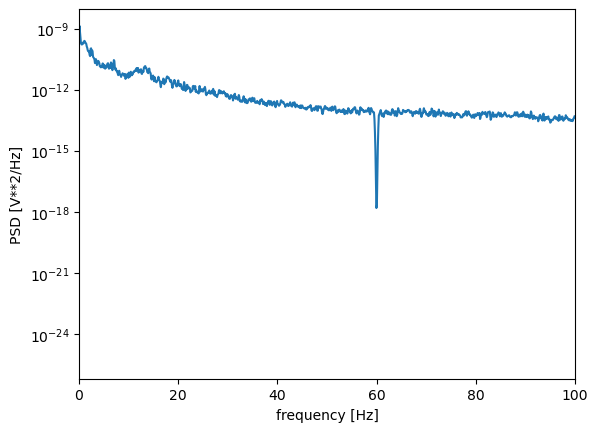

In [96]:
(f, S)= signal.welch(data, fs=raw.info['sfreq'], nperseg=1024*5)

plt.semilogy(f, S)
plt.xlim([0, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [72]:
# #Getting the ER values for every frequency band
# ETheta = np.sum(S[np.where((f>=3.5) & (f<7.4))])   
# EAlpha = np.sum(S[np.where((f>=7.4) & (f<12.4))])
# EBeta = np.sum(S[np.where((f>=12.4) & (f<24))])
# EGamma = np.sum(S[np.where((f>=24) & (f<=97))])

# ER= (EBeta + EGamma)/(ETheta + EAlpha)
# print(ER)

1.425705371965328


In [26]:
def calculate_ER(S, f, window_size, overlap):
    """
    Calculate time-varying Energy Ratio (ER) from Theta(w) using a sliding window.

    Parameters:
    - S: Periodogram estimate for Theta(w)
    - f: Frequency vector
    - window_size: Size of the sliding window in samples
    - overlap: Overlap between consecutive windows in samples

    Returns:
    - time_points: Array of time points corresponding to the center of each window
    - ER_values: Array of time-varying ER values
    """

    # Initialize empty arrays to store results
    time_points = []
    ER_values = []

    # Iterate through the signal with the sliding window
    for start in range(0, len(S) - window_size + 1, overlap):
        end = start + window_size

        # Calculate energy in each frequency band for the current window
        ETheta = np.sum(S[start:end][np.where((f >= 3.5) & (f < 7.4))])
        EAlpha = np.sum(S[start:end][np.where((f >= 7.4) & (f < 12.4))])
        EBeta = np.sum(S[start:end][np.where((f >= 12.4) & (f < 24))])
        EGamma = np.sum(S[start:end][np.where((f >= 24) & (f <= 97))])

        # Calculate Energy Ratio (ER) for the current window
        ER = (EBeta + EGamma) / (ETheta + EAlpha)

        # Store results
        time_points.append((start + end) / 2)  # Use the center of the window as the time point
        ER_values.append(ER)

    return np.array(time_points), np.array(ER_values)

# Example usage
# Assuming S is your periodogram estimate for Theta(w) and f is the corresponding frequency vector
window_size = 50#Adjust as needed
overlap = 7  # Adjust as needed
time_points, ER_values = calculate_ER(S, f, window_size, overlap)


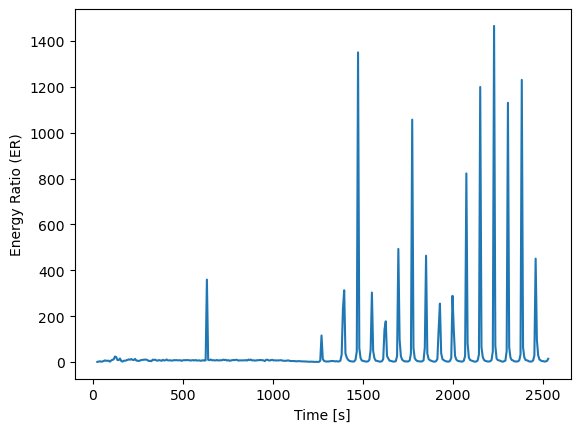

In [27]:
#Plotting the ER values
plt.plot(time_points, ER_values)
plt.xlabel('Time [s]')
plt.ylabel('Energy Ratio (ER)')
plt.show()


In [97]:
N

119

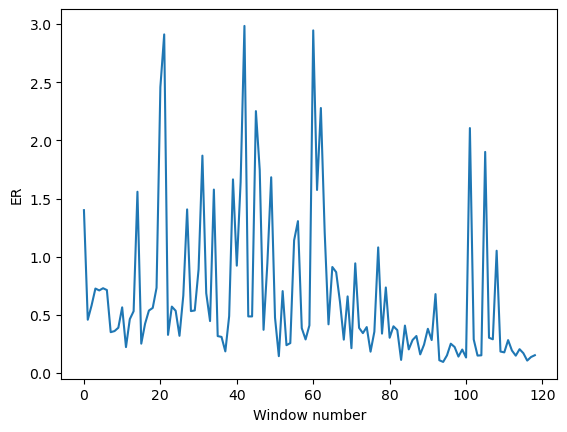

In [98]:
##Getting ER[n] using the periodogram method with sliding windowsn=k*delta where k is the window number and delta is the window shift
k=5
delta=k*T
ER=np.zeros(int(L/(k*fs))) 
#Number of samples in the window
n=int(k*fs)
#Window length
N=int(L/n)

for i in range(N):
    #Getting the window
    window=data[i*n:(i+1)*n]
    #Getting the periodogram of the window
    (f, S)= signal.welch(window, fs=raw.info['sfreq'], nperseg=n)
    #Getting the ER values for every frequency band
    ETheta = np.sum(S[np.where((f>=3.5) & (f<7.4))])   
    EAlpha = np.sum(S[np.where((f>=7.4) & (f<12.4))])
    EBeta = np.sum(S[np.where((f>=12.4) & (f<24))])
    EGamma = np.sum(S[np.where((f>=24) & (f<=97))])
    ER[i] = (EBeta + EGamma)/(ETheta + EAlpha)
plt.plot(ER)
plt.xlabel('Window number')
plt.ylabel('ER')
plt.show()


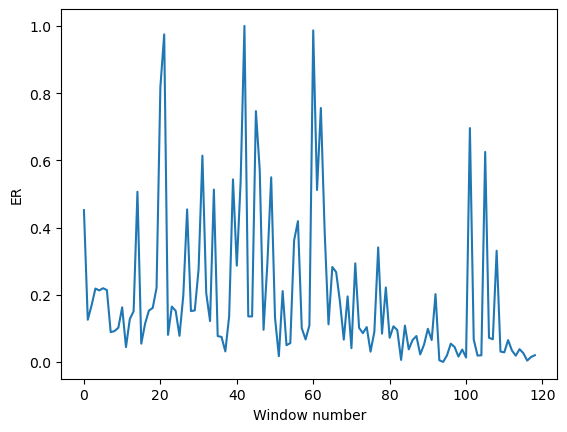

In [99]:
#Normalize between 0 and 1
ER = (ER - np.min(ER))/(np.max(ER)-np.min(ER))
plt.plot(ER)
plt.xlabel('Window number')
plt.ylabel('ER')
plt.show()

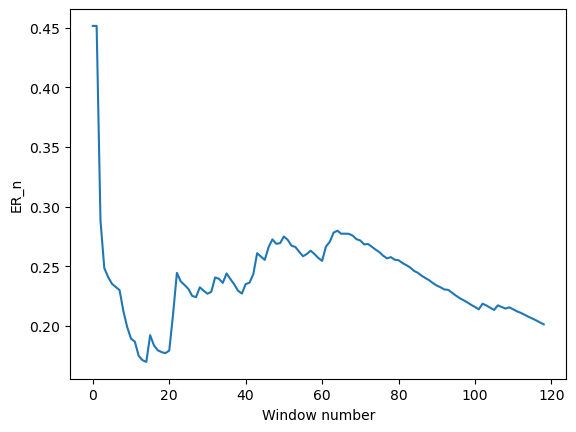

In [100]:
ER_n=np.zeros(int(L/(k*fs)))
#A loop from the second window to the last one
ER_n[0]=ER[0]
for i in range(1,N):
    ER_n[i]=(1/i)*np.sum(ER[0:i])
plt.plot(ER_n)
plt.xlabel('Window number')
plt.ylabel('ER_n')
plt.show()

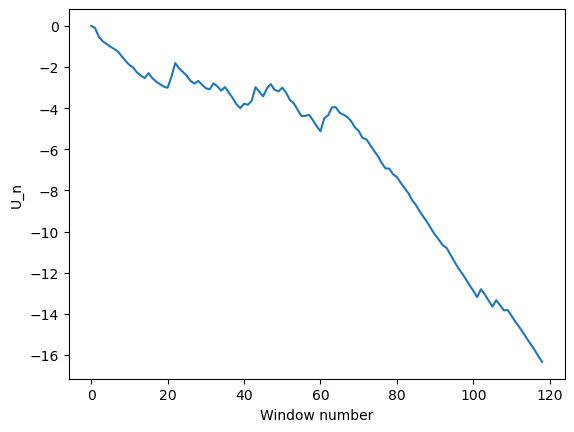

In [101]:
##Getting U_n
U_n=np.zeros(int(L/(k*fs)))
v=0.1
for i in range(N):
    U_n[i]=np.sum(ER[0:i]-ER_n[0:i]-0.1)
plt.plot(U_n)
plt.xlabel('Window number')
plt.ylabel('U_n')
plt.show()

The local minimum of U_n is:  -16.340383113388068
The lambda value is:  0.2
The change points are:  (array([118]),)


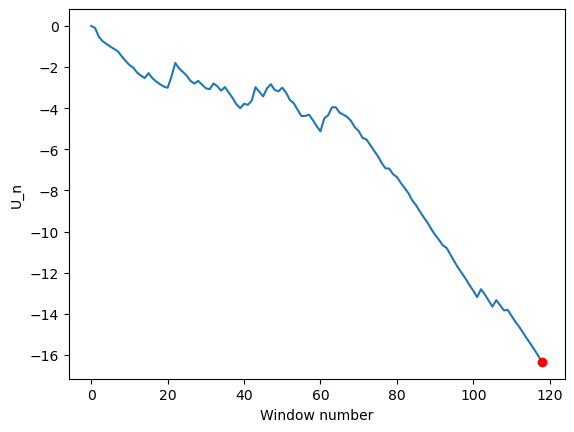

In [102]:
#Finding the minimum local of U_n
u_min=np.min(U_n)
print("The local minimum of U_n is: ",u_min)
#Now, the H_O is the null hypothesis that : no change has ocurred in ER
#The null mhypothesis is rejected if (U_n-u_min)>lambda
#The lambda value is the threshold
#Getting the lambda value
lambda_value=0.2
print("The lambda value is: ",lambda_value)
#Getting the change points
change_points=np.where(U_n-u_min<lambda_value)
print("The change points are: ",change_points)
#Plotting the change points
plt.plot(U_n)
plt.plot(change_points[0],U_n[change_points[0]],'ro')
plt.xlabel('Window number')
plt.ylabel('U_n')
plt.show()

In [103]:
#Un detalle importante es que el ejemplo de este canal no sirve para los efectos de encontrar un lambda asociado. 
#De acuerdo al paper, el lambda asociado se encuentra porque existe un pico que casi toca el 0, y es totalmente notorio
#Se requiere entonces intentar con otras señales que sean mas volátiles

#Intentar implementar overlaping widows